# * Kurapati Venkatesh

# * 09012021

# * Topic: Logistic Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## Prediction of election results has become trivial in these days, the outcome variable is (0/1) and the other factors that affect a candidate win or loss is amount of money spent, popularity and more. Perform Logistic Regression on the dataset and classify the candidates.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model to perform Logistic Regression on the given data and classify the candidates.

## -------------------------------------------------------------------------------------------

## import libraries:

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

## import dataset:

In [2]:
el = pd.read_csv(r"G:\360digit\assignments meterial\logistic regression\election_data.csv")

In [3]:
el.head()

,Election-id,Result,Year,Amount Spent,Popularity Rank
0,NaN,NaN,NaN,NaN,NaN
1,122.0,0.0,32.0,3.81,3.0
2,315.0,1.0,48.0,6.32,2.0
3,201.0,1.0,51.0,3.67,1.0
4,965.0,0.0,40.0,2.93,4.0


In [11]:
el = el.dropna()

###### removing Election-id which is not necessary

In [12]:
df = el.drop('Election-id', axis = 1)

In [13]:
df.head()

,Result,Year,Amount Spent,Popularity Rank
1,0.0,32.0,3.81,3.0
2,1.0,48.0,6.32,2.0
3,1.0,51.0,3.67,1.0
4,0.0,40.0,2.93,4.0
5,1.0,52.0,3.60,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Result           10 non-null     float64
 1   Year             10 non-null     float64
 2   Amount Spent     10 non-null     float64
 3   Popularity Rank  10 non-null     float64
dtypes: float64(4)
memory usage: 400.0 bytes


In [15]:
df.describe(include = "all")

,Result,Year,Amount Spent,Popularity Rank
count,10.000000,10.000000,10.000000,10.000000
mean,0.600000,43.300000,4.229000,2.700000
std,0.516398,6.912951,1.055351,1.159502
min,0.000000,32.000000,2.930000,1.000000
25%,0.000000,39.250000,3.617500,2.000000
50%,1.000000,43.000000,4.005000,3.000000
75%,1.000000,49.500000,4.470000,3.750000
max,1.000000,52.000000,6.320000,4.000000


In [16]:
df.isna().sum()

Result             0
Year               0
Amount Spent       0
Popularity Rank    0
dtype: int64

### EDA:

<AxesSubplot:>

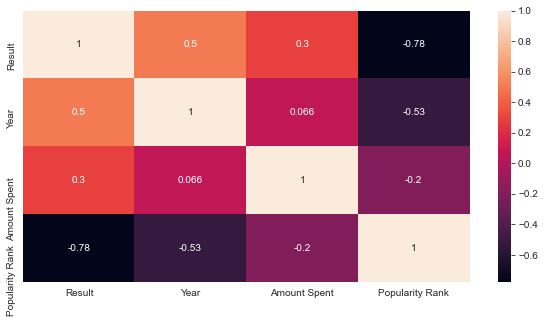

In [23]:
# Making a heatmap to find correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

#### How Amount spent affects the Result.

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


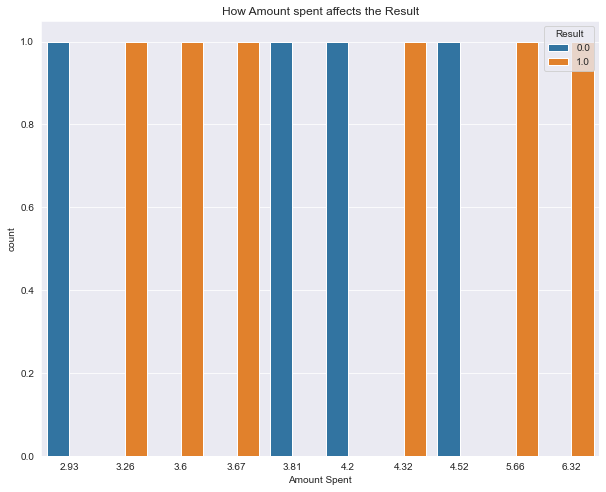

In [25]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.countplot("Amount Spent",data=df,hue="Result")
plt.title("How Amount spent affects the Result")
plt.show()

#### How unhappiness affects the husband-wife relationship.

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


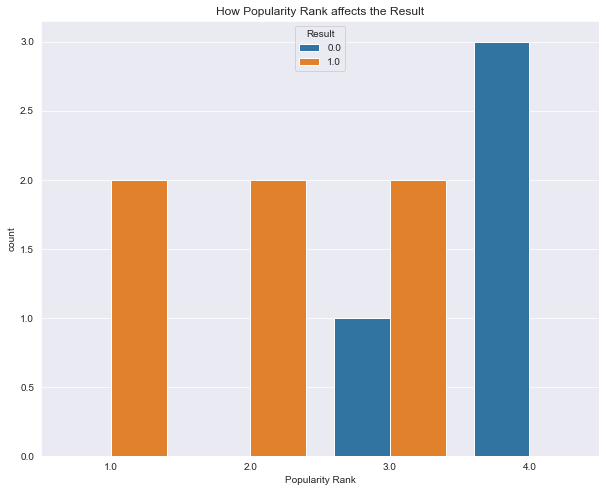

In [26]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.countplot("Popularity Rank",data=df,hue="Result")
plt.title("How Popularity Rank affects the Result")
plt.show()

<AxesSubplot:>

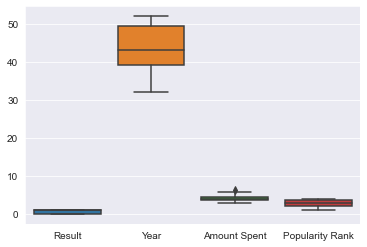

In [27]:
sns.boxplot(data =df)

## Model building:

In [33]:
df.rename(columns = {'Amount Spent':'Amount_Spent', 'Popularity Rank':'Popularity_Rank' }, inplace = True)

In [42]:
df.columns

Index(['Result', 'Year', 'Amount_Spent', 'Popularity_Rank'], dtype='object')

In [55]:
import statsmodels.api as sm

In [56]:
formula = 'Result ~ Year+Amount_Spent+Popularity_Rank'

The glm() function fits generalized linear models, a class of models that includes logistic regression. The syntax of the glm() function is similar to that of lm(), except that we must pass in the argument family=sm.families.Binomial() in order to tell python to run a logistic regression rather than some other type of generalized linear model.

In [58]:
model = smf.glm(formula = formula, data=df)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Result   No. Observations:                   10
Model:                            GLM   Df Residuals:                        6
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                         0.14321
Method:                          IRLS   Log-Likelihood:                -1.9179
Date:                Tue, 20 Apr 2021   Deviance:                      0.85923
Time:                        01:07:09   Pearson chi2:                    0.859
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6533      1.317     

The smallest p-value here is associated with Lag1.

## Logistic Regression:

- Now it's time to do a train test split, and train our model!

- You'll have the freedom here to choose columns that you want to train on!

##### Split the data into training set and testing set using train_test_split:

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
df.columns

Index(['Result', 'Year', 'Amount_Spent', 'Popularity_Rank'], dtype='object')

In [67]:
X = df[['Year', 'Amount_Spent', 'Popularity_Rank']]
y = df['Result']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [69]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7, 3) (7,)
(3, 3) (3,)


##### Train and fit a logistic regression model on the training set:

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(X_train,y_train)

LogisticRegression()

### Predictions and Evaluations:

##### Now predict values for the testing data:

In [72]:
predictions = logmodel.predict(X_test)
predictions

array([0., 0., 1.])

##### Create a classification report for the model:

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
#Importing a pure confusion matrix from sklearn.metrics family
from sklearn.metrics import confusion_matrix

# Printing the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[0 0]
 [2 1]]


In [76]:
logmodel.coef_

array([[ 0.19582449, -0.47060703, -0.83263889]])

We use the .params attribute in order to access just the coefficients for this fitted model. Similarly, we can use .pvalues to get the p-values for the coefficients, and .model.endog_names to get the endogenous (or dependent) variables.